# Bike Sharing - Case Study

*Author: Minh Nguyen*

## Loading Dataset and Init Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
# Load dataset from local
df = pd.read_csv("day.csv")
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


## Data Understanding

In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Display the overview of dataset
print(f"Total Rows: {df.shape[0]} records - Total Columns :{df.shape[1]} columns")

Total Rows: 730 records - Total Columns :16 columns


There are several columns in the dataset that are unnecessary.
- The instant column: Alternative of Index column
- The casual column and registered column: Sub columns of the target column (cnt)


In [7]:
# There are some columns that not necessary in the dataset.
# The instant column: Alternative of Index column
# The casual column and registered column: Sub columns of target column (cnt)

df = df.drop(columns=["instant", "casual", "registered"])
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


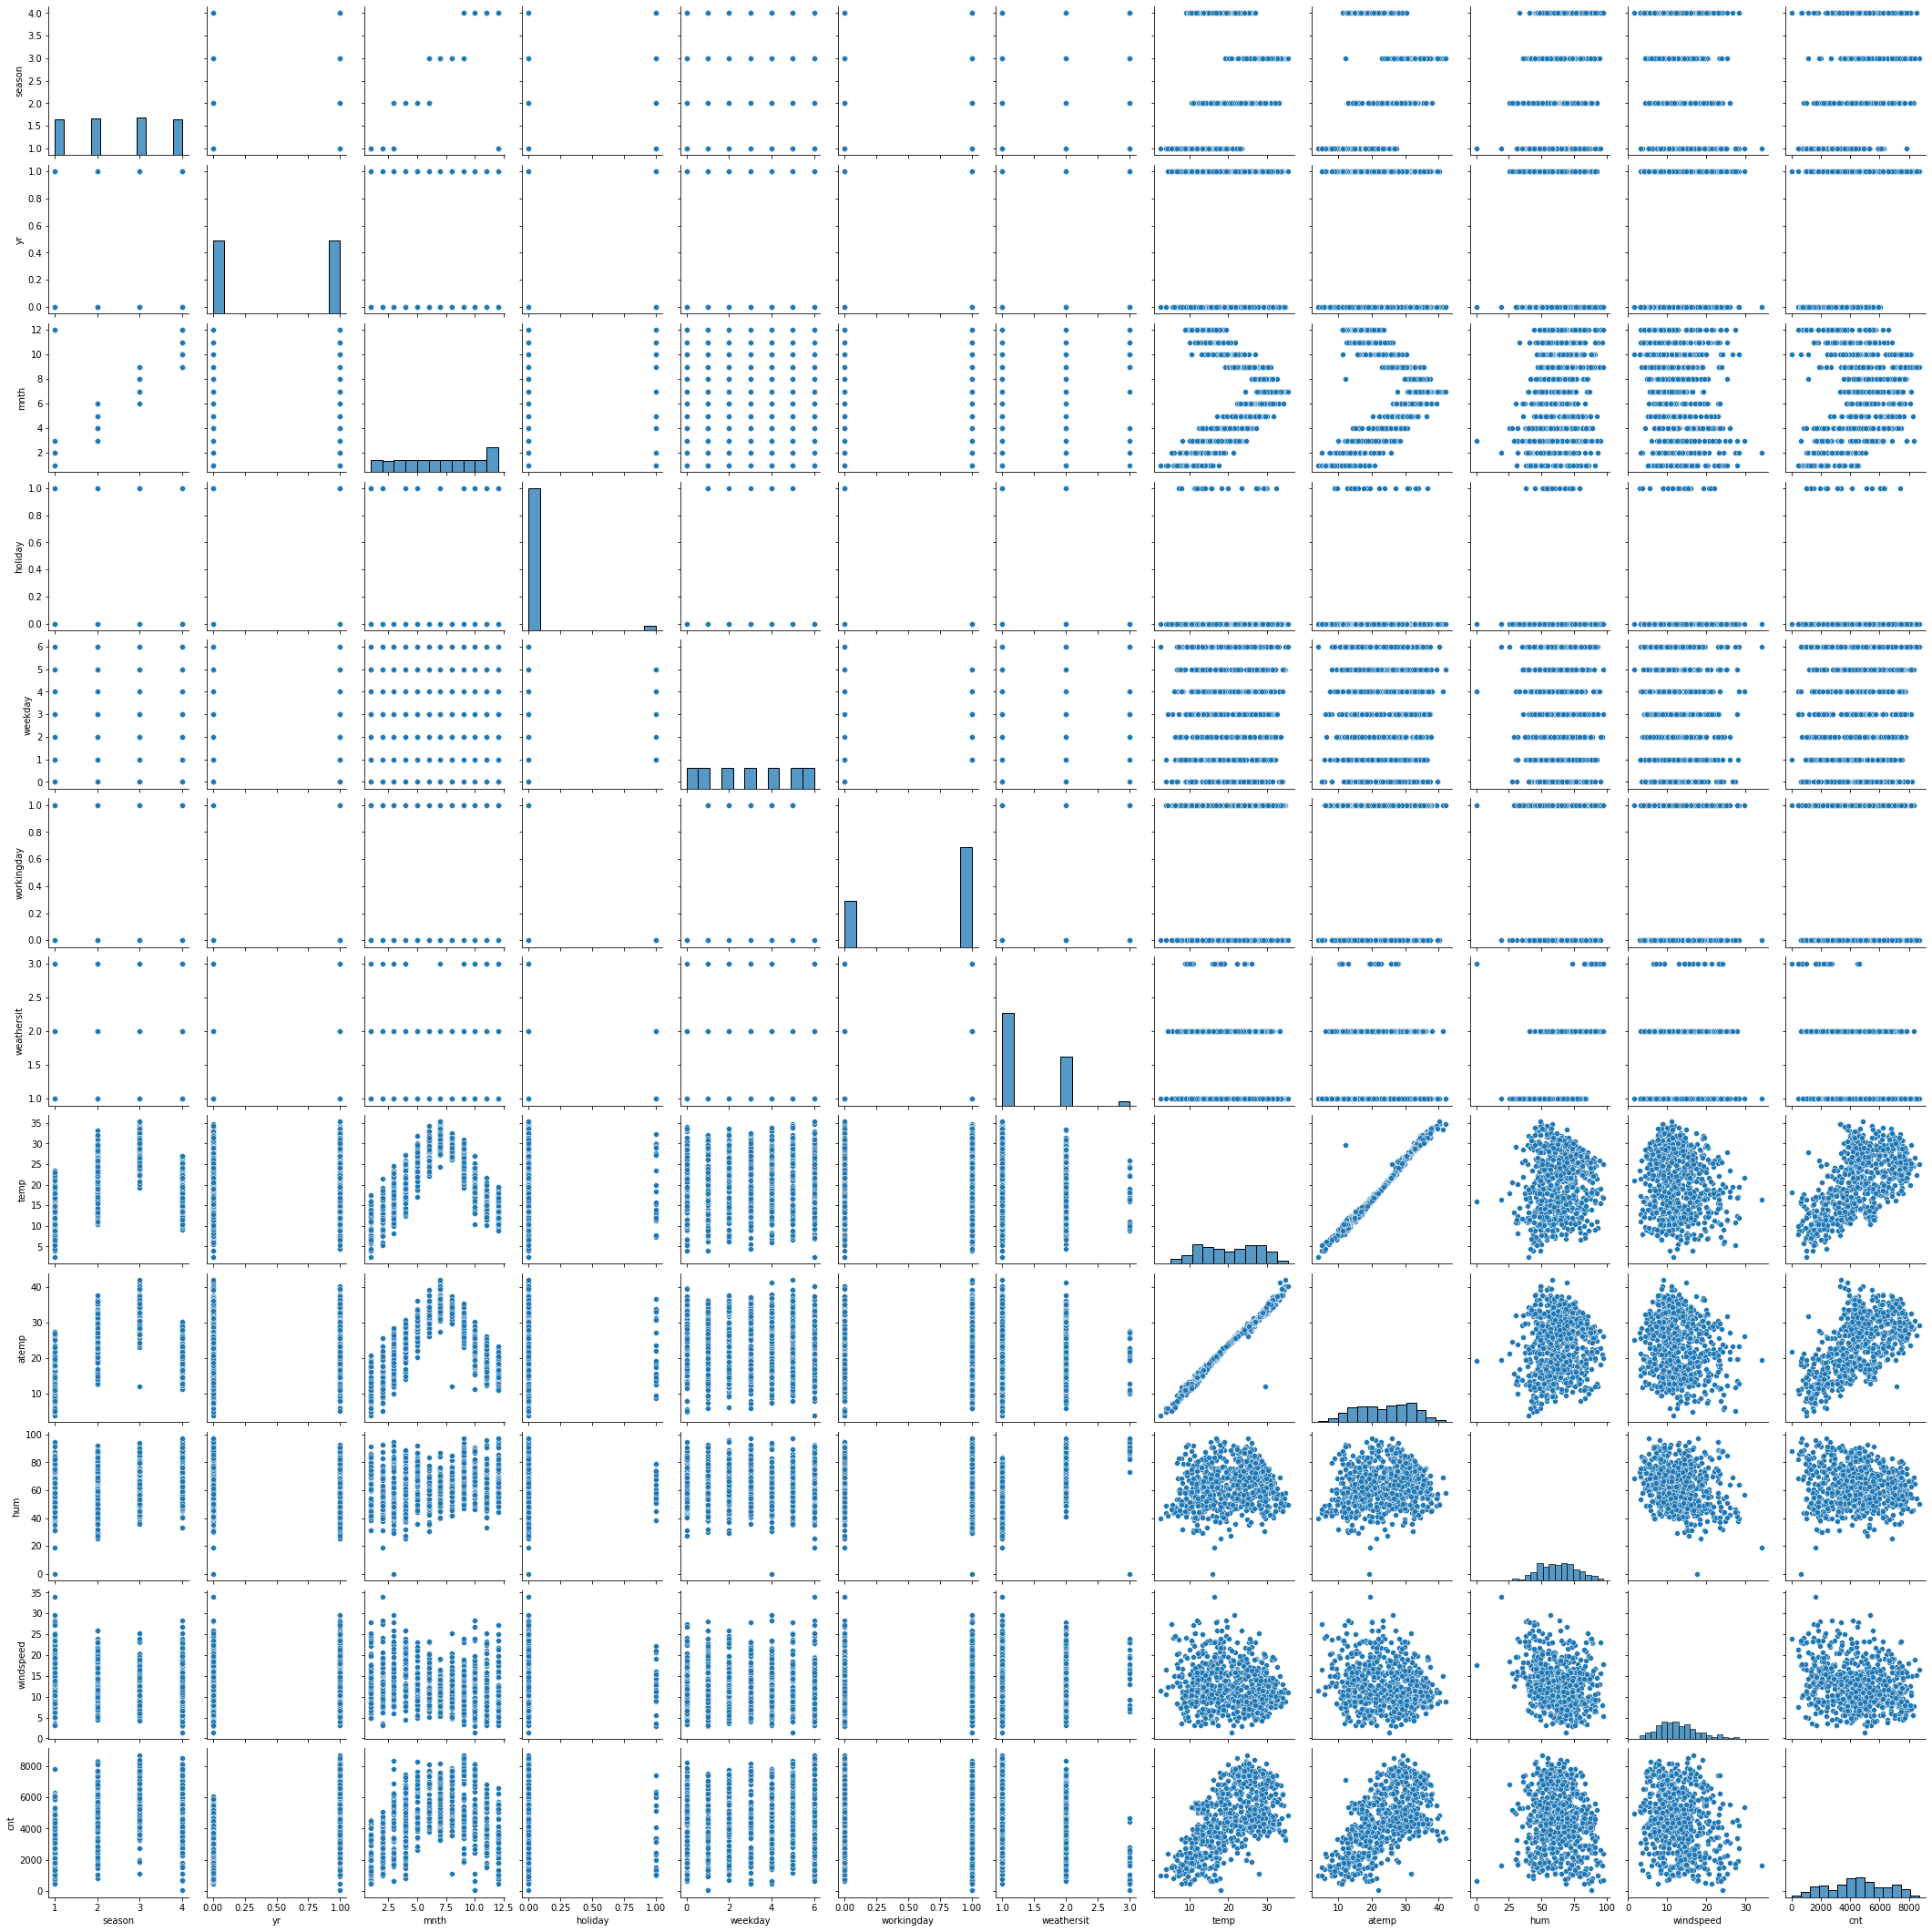

In [8]:
# Quickly check the correlation between all columns with other columns

sns.pairplot(df)
plt.show()

## Data Cleaning

### Summary
<li> Drop Duplicates records </li>
<li> Remove rows with null values > 40% </li>
<li> Drop columns that has null value > 40% </li>
<li> Drop columns that only has 1 value </li>

In [9]:
df_filter = df.drop_duplicates(keep="first")
df_filter

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [10]:
# Remove rows with total null features > 80% and drop columns that has total null records > 80%
df_filter = df_filter.dropna(axis=1, thresh=len(df_filter)*0.2)
df_filter = df_filter.dropna(axis=0, thresh=len(df_filter.columns)*0.2)
df_filter

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


<b>Display all columns that has null value</b>

In [11]:
cols_remove = []
columns_left = df_filter.columns[df_filter.isnull().sum() > 0]
print(columns_left)
for column in columns_left:
    print("*"*100)
    print(f"Column name: {column}\n")
    print(f"Total Num: {df_filter[column].isnull().sum()} - Ratio: {round(df_filter[column].isnull().sum() * 100/len(df_filter))}%\n")
    print(f"Total Distinct Value: {len(pd.unique(df_filter[column]))}")
    print(df_filter[column].value_counts())
    if len(df_filter[column].value_counts()) == 1:
        cols_remove += [column]
    
# Drop columns that only has 1 value
df_filter = df_filter.drop(columns = cols_remove)

Index([], dtype='object')


In [12]:
df_filter.shape

(730, 13)

## EDA

### Visualize the data correlation

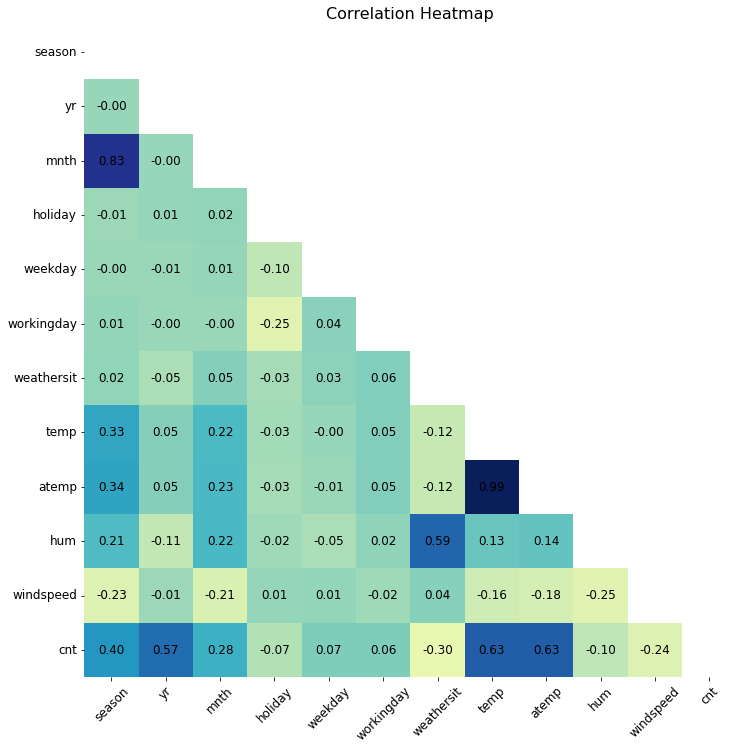

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(20,12))
corr = df_filter.corr()

corr = corr.dropna(axis=1, thresh=len(corr)*0.1)
corr = corr.dropna(axis=0, thresh=len(corr.columns)*0.1)

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, mask=mask,
            fmt='.2f', square=True, cmap="YlGnBu", vmin=-0.5,
            vmax=1, cbar=False, annot_kws={"fontsize": 12, "color": "black"})

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()



<b>Use only top correlated features with the Cnt columns for analyzing 

In [14]:
# Only Focus on the loan status column correlation
df_loan_corr = pd.DataFrame(df_filter.corrwith(df_filter['cnt']), columns=["corr"]).sort_values(by = ["corr"], ascending=False).dropna()

# Top 5 top and bottom correlation features
list_to_analyze = list(set(df_loan_corr.head(6).append(df_loan_corr.tail(6)).index.tolist()) - {"cnt"})
print(list_to_analyze)
df_loan_corr.head(10)

['mnth', 'yr', 'season', 'workingday', 'weathersit', 'holiday', 'hum', 'atemp', 'temp', 'windspeed', 'weekday']


,corr
cnt,1.000000
atemp,0.630685
temp,0.627044
yr,0.569728
season,0.404584
mnth,0.278191
weekday,0.067534
workingday,0.062542
holiday,-0.068764
hum,-0.098543


In [15]:
list_to_analyze

['mnth',
 'yr',
 'season',
 'workingday',
 'weathersit',
 'holiday',
 'hum',
 'atemp',
 'temp',
 'windspeed',
 'weekday']

### Visualize the continuous features

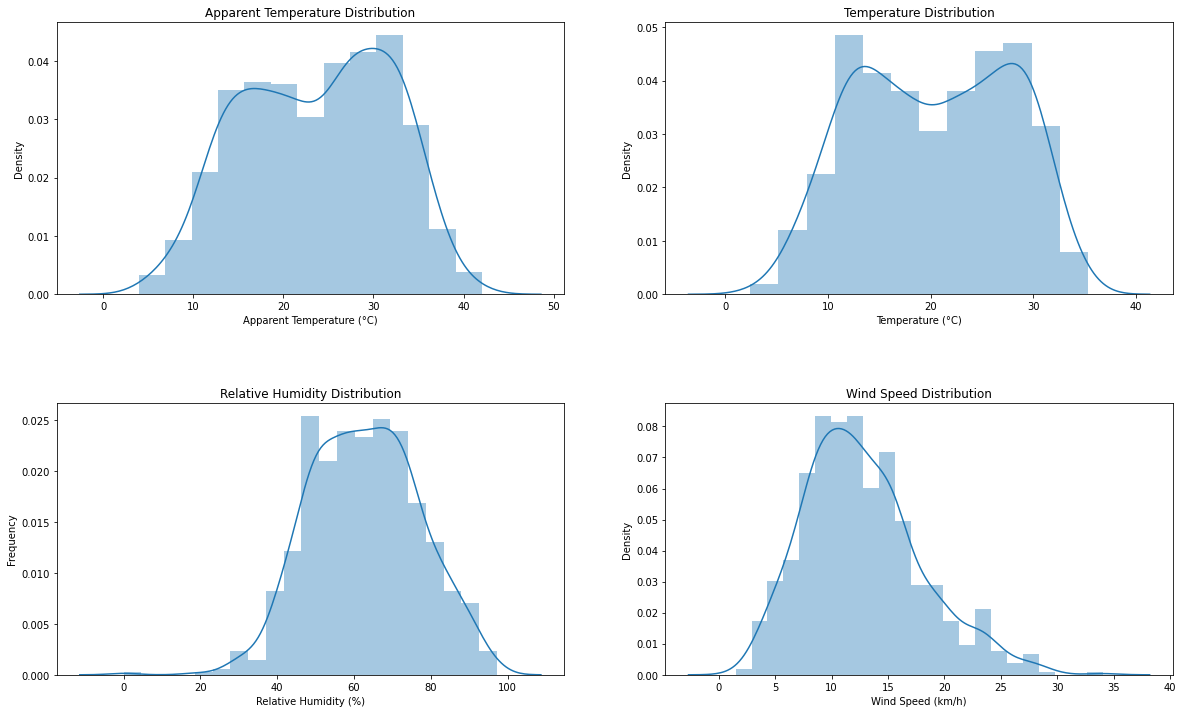

In [16]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
sns.distplot(df_filter["atemp"])
plt.title("Apparent Temperature Distribution")
plt.xlabel("Apparent Temperature (°C)")

plt.subplot(2,2,2)
sns.distplot(df_filter["temp"])
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")

plt.subplot(2,2,3)
sns.distplot(df_filter["hum"])
plt.title("Relative Humidity Distribution")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Frequency")

plt.subplot(2,2,4)
sns.distplot(df_filter["windspeed"])
plt.title("Wind Speed Distribution")
plt.xlabel("Wind Speed (km/h)")

plt.subplots_adjust(hspace=0.4)
plt.show()


### Visualize the categorical features

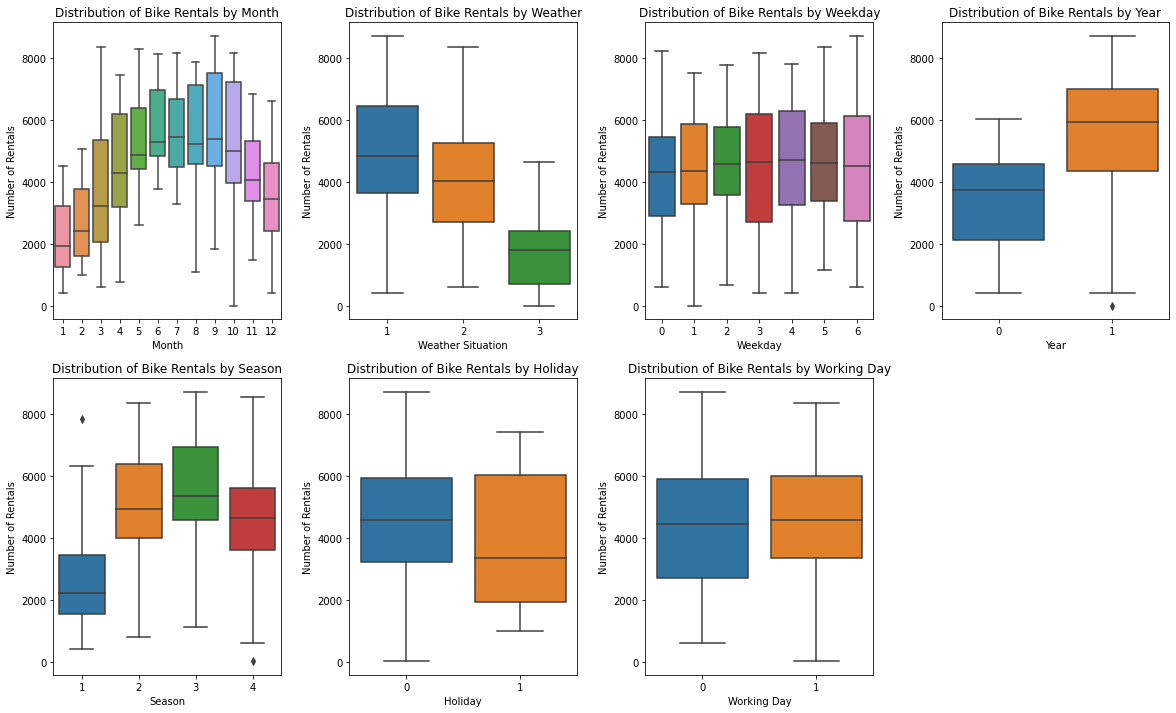

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
sns.boxplot(x="mnth", y="cnt", data=df_filter)
plt.title("Distribution of Bike Rentals by Month")
plt.xlabel("Month")
plt.ylabel("Number of Rentals")

plt.subplot(2,4,2)
sns.boxplot(x="weathersit", y="cnt", data=df_filter)
plt.title("Distribution of Bike Rentals by Weather")
plt.xlabel("Weather Situation")
plt.ylabel("Number of Rentals")

plt.subplot(2,4,3)
sns.boxplot(x="weekday", y="cnt", data=df_filter)
plt.title("Distribution of Bike Rentals by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Rentals")

plt.subplot(2,4,4)
sns.boxplot(x="yr", y="cnt", data=df_filter)
plt.title("Distribution of Bike Rentals by Year")
plt.xlabel("Year")
plt.ylabel("Number of Rentals")

plt.subplot(2,4,5)
sns.boxplot(x="season", y="cnt", data=df_filter)
plt.title("Distribution of Bike Rentals by Season")
plt.xlabel("Season")
plt.ylabel("Number of Rentals")

plt.subplot(2,4,6)
sns.boxplot(x="holiday", y="cnt", data=df_filter)
plt.title("Distribution of Bike Rentals by Holiday")
plt.xlabel("Holiday")
plt.ylabel("Number of Rentals")

plt.subplot(2,4,7)
sns.boxplot(x="workingday", y="cnt", data=df_filter)
plt.title("Distribution of Bike Rentals by Working Day")
plt.xlabel("Working Day")
plt.ylabel("Number of Rentals")

plt.subplots_adjust(wspace=0.3)
plt.show()


## Data Initilization

In [18]:
list_of_cate_cols = ["weathersit", "season"]
df_dummy = pd.get_dummies(df_filter[list_of_cate_cols].astype('category'), drop_first=True)
df_dummy

,weathersit_2,weathersit_3,season_2,season_3,season_4
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
725,1,0,0,0,0
726,1,0,0,0,0
727,1,0,0,0,0
728,0,0,0,0,0


In [21]:
df_final = pd.concat([df_filter.drop(columns = list_of_cate_cols, axis=1), df_dummy], axis=1)
df_final = df_final.drop(columns = ["dteday"], axis = 1)
df_final

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_2,weathersit_3,season_2,season_3,season_4
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,4,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,0,0
726,1,12,0,5,1,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,0,0
727,1,12,0,6,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,0,0
728,1,12,0,0,0,10.489153,11.58500,48.3333,23.500518,1796,0,0,0,0,0


## Model Training and Validation

In [114]:
# Splitting dataset
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_final, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 15)
(220, 15)


In [115]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create a scaling object
scaler = MinMaxScaler()

# Create a list of the variables that you need to scale
varlist = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

df_train

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_2,weathersit_3,season_2,season_3,season_4
576,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0
426,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0
728,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0
482,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,1,0,0
111,0,4,0,5,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,8,0,4,1,0.863973,0.824359,0.679690,0.187140,0.832835,0,0,0,1,0
53,0,2,0,3,1,0.202618,0.218747,0.435939,0.111379,0.218017,0,0,0,0,0
350,0,12,0,6,0,0.248216,0.223544,0.577930,0.431816,0.312586,1,0,0,0,1
79,0,3,0,1,1,0.462664,0.434043,0.759870,0.529881,0.236424,1,0,1,0,0


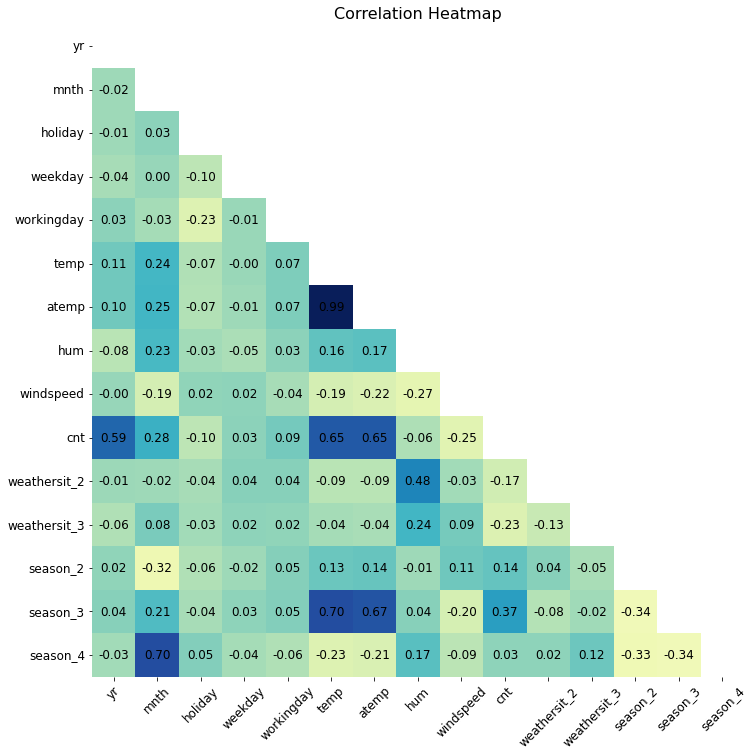

In [116]:
plt.figure(figsize=(20,12))
corr = df_train.corr()

corr = corr.dropna(axis=1, thresh=len(corr)*0.1)
corr = corr.dropna(axis=0, thresh=len(corr.columns)*0.1)

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, mask=mask,
            fmt='.2f', square=True, cmap="YlGnBu", vmin=-0.5,
            vmax=1, cbar=False, annot_kws={"fontsize": 12, "color": "black"})

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()



In [117]:
# Split the train dataset into X and y

y_train = df_train.pop('cnt')
X_train = df_train

In [118]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [119]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [120]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1)]

In [121]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [122]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [124]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     176.8
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          3.01e-182
Time:                        22:41:41   Log-Likelihood:                 495.79
No. Observations:                 510   AIC:                            -961.6
Df Residuals:                     495   BIC:                            -898.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1691      0.030      5.650   

,Features,VIF
6,temp,57.99
7,atemp,53.56
0,const,52.93
13,season_3,6.09
14,season_4,5.39
2,mnth,3.89
12,season_2,2.67
8,hum,1.90
10,weathersit_2,1.58
11,weathersit_3,1.26


In [126]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.7
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.35e-183
Time:                        22:42:40   Log-Likelihood:                 495.69
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     496   BIC:                            -904.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1700      0.030      5.698   

,Features,VIF
0,const,52.69
12,season_3,6.02
13,season_4,5.39
2,mnth,3.89
6,temp,3.51
11,season_2,2.67
7,hum,1.90
9,weathersit_2,1.58
10,weathersit_3,1.25
8,windspeed,1.20


In [127]:
X_train_new = X_train_rfe.drop(["atemp", "mnth"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.8
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.89e-184
Time:                        22:43:30   Log-Likelihood:                 495.52
No. Observations:                 510   AIC:                            -965.0
Df Residuals:                     497   BIC:                            -910.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1724      0.030      5.841   

,Features,VIF
0,const,51.66
11,season_3,4.78
5,temp,3.50
10,season_2,2.55
6,hum,1.88
12,season_4,1.87
8,weathersit_2,1.57
9,weathersit_3,1.25
7,windspeed,1.20
2,holiday,1.08


In [128]:
X_train_new = X_train_rfe.drop(["atemp", "mnth", "workingday"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.8
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          9.89e-185
Time:                        22:43:53   Log-Likelihood:                 493.37
No. Observations:                 510   AIC:                            -962.7
Df Residuals:                     498   BIC:                            -911.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1859      0.029      6.440   

,Features,VIF
0,const,49.08
10,season_3,4.78
4,temp,3.50
9,season_2,2.55
5,hum,1.88
11,season_4,1.86
7,weathersit_2,1.57
8,weathersit_3,1.25
6,windspeed,1.19
1,yr,1.04


In [129]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

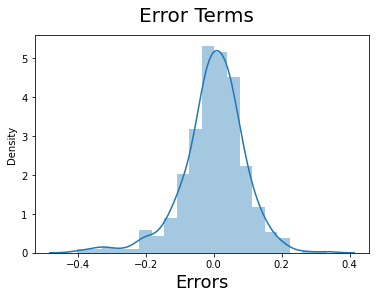

In [130]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [131]:
# Create a list of the variables that you need to scale
varlist = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Scale these variables using 'fit_transform'
df_test[varlist] = scaler.transform(df_test[varlist])

df_test

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_2,weathersit_3,season_2,season_3,season_4
184,0,7,1,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,1,0,0,1,0
535,1,6,0,3,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,1,0,0
299,0,10,0,4,1,0.511964,0.496145,0.837699,0.334206,0.303382,1,0,0,0,1
221,0,8,0,3,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0
152,0,6,0,4,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,12,0,2,1,0.519232,0.511907,0.756118,0.283397,0.757478,0,0,0,0,1
127,0,5,0,0,0,0.584649,0.577380,0.650923,0.069510,0.495973,0,0,1,0,0
640,1,10,0,3,1,0.745598,0.682653,0.817947,0.052115,0.868615,1,0,0,0,1
72,0,3,0,1,1,0.331557,0.332005,0.512107,0.203418,0.232858,0,0,0,0,0


In [132]:
# Split the test dataset into X and y

y_test = df_test.pop('cnt')
X_test = df_test

In [133]:
X_test_sm = sm.add_constant(X_test)
X_test_sm = X_test_sm.drop(["atemp", "mnth", "workingday"], axis = 1)

y_test_pred = lm.predict(X_test_sm)

In [134]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=y_test_pred)

0.8107009407264982

Text(0, 0.5, 'y_pred')

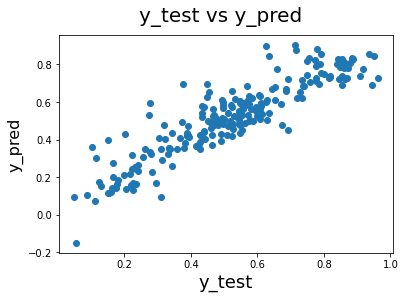

In [135]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  